In [69]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
os.getcwd()

In [ ]:
#change working directory if data is in that location
data_dir='Z:\ML Course\Clustering\Data'

In [ ]:
os.chdir(data_dir)

In [70]:
data=pd.read_csv("kc_housingdata.csv")

In [75]:
type(data)

pandas.core.frame.DataFrame

In [71]:
data.shape

(21613, 21)

In [72]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [73]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [74]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
## Choose columns that are numeric and have a numeric interpretation
data_num=data[['price','bedrooms','bathrooms','sqft_living']]

In [7]:
data_num.dtypes

price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
dtype: object

In [8]:
## Scale the data, using pandas
def scale(x):
    return (x-np.mean(x))/np.std(x)
data_scaled=data_num.apply(scale,axis=0) #axis = 0 for all rows of the column, axis = 1 for all columns of a row

In [76]:
data_scaled.head()

,price,bedrooms,bathrooms,sqft_living
0,-0.866717,-0.398737,-1.447464,-0.979835
1,-0.005688,-0.398737,0.175607,0.533634
2,-0.980849,-1.473959,-1.447464,-1.426254
3,0.174090,0.676485,1.149449,-0.130550
4,-0.081958,-0.398737,-0.149007,-0.435422


In [78]:
type(data_scaled)

pandas.core.frame.DataFrame

In [77]:
## Scale the data using sklearn
import sklearn.preprocessing as preprocessing
dat_scaled=preprocessing.scale(data_num,axis=0)

In [12]:
print (dat_scaled)
print ("Type of output is "+str(type(dat_scaled)))
print ("Shape of the object is "+str(dat_scaled.shape))

[[-0.86671733 -0.39873715 -1.44746357 -0.97983502]
 [-0.00568792 -0.39873715  0.1756067   0.53363434]
 [-0.98084935 -1.47395936 -1.44746357 -1.42625404]
 ..., 
 [-0.37586519 -1.47395936 -1.77207762 -1.15404732]
 [-0.38158814 -0.39873715  0.50022075 -0.52252773]
 [-0.58588173 -1.47395936 -1.77207762 -1.15404732]]
Type of output is <type 'numpy.ndarray'>
Shape of the object is (21613L, 4L)


In [79]:
## Create a cluster model
import sklearn.cluster as cluster

In [80]:
kmeans=cluster.KMeans(n_clusters=3,init="k-means++")
kmeans=kmeans.fit(dat_scaled)

In [55]:
kmeans.labels_

array([0, 1, 0, ..., 0, 1, 0])

In [83]:
np.unique(kmeans.labels_)

array([0, 1, 2])

In [16]:
kmeans.cluster_centers_ #every cluster has 4 centers, one each along its dimensions

array([[ 1.92403096,  1.08801922,  1.55363644,  1.9442457 ],
       [-0.46410913, -0.72272101, -0.86103759, -0.78942185],
       [-0.02812926,  0.3619512 ,  0.37648989,  0.2346359 ]])

In [84]:
dat_scaled

array([[-0.86671733, -0.39873715, -1.44746357, -0.97983502],
       [-0.00568792, -0.39873715,  0.1756067 ,  0.53363434],
       [-0.98084935, -1.47395936, -1.44746357, -1.42625404],
       ..., 
       [-0.37586519, -1.47395936, -1.77207762, -1.15404732],
       [-0.38158814, -0.39873715,  0.50022075, -0.52252773],
       [-0.58588173, -1.47395936, -1.77207762, -1.15404732]])

In [86]:
cdist(dat_scaled, kmeans.cluster_centers_, 'euclidean') #each point/row in data gets three distances, one for each cluster

array([[ 2.48543228,  0.81135911,  5.2923075 ],
       [ 0.84896744,  1.76116993,  3.1755315 ],
       [ 3.23953208,  1.26890599,  5.98744496],
       ..., 
       [ 3.18678682,  1.25174973,  5.73984547],
       [ 1.15463579,  1.41459251,  3.87919198],
       [ 3.21700854,  1.25482471,  5.82856035]])

In [105]:
## Elbow method
from scipy.spatial.distance import cdist
K=range(1,20)
wss = []
for k in K:
    kmeans = cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(dat_scaled)
    wss.append(sum(np.min(cdist(dat_scaled, kmeans.cluster_centers_, 'euclidean'), 
                                      axis=1)) / dat_scaled.shape[0])
    
    #cdist calculates distances across co-ordinate axes


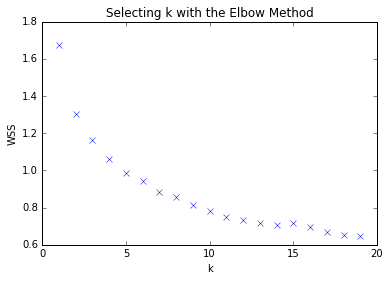

In [91]:
plt.plot(K, wss, 'bx')
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [93]:
import sklearn.metrics as metrics
labels=cluster.KMeans(n_clusters=8,random_state=200).fit(dat_scaled).labels_
#depending on the initiation points the final result of kmeans can vary. Therefore random_state = 200 is set as seed to get- 
# -the same reults again and again


In [104]:
labels

array([ 7, 11,  4, ...,  4,  9,  4])

In [95]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [59]:
metrics.silhouette_score(dat_scaled,labels,metric="euclidean",sample_size=10000,random_state=200)
#The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) 
#for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). 
#To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. 
#sample_size is the size of the sample to use when computing the Silhouette Coefficient on a random subset of the data.
#If sample_size is None, no sampling is used.

0.28310388001911169

In [106]:
for i in range(7,13):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(dat_scaled).labels_
    print ("Silhoutte score for k= "+str(i)+" is "+str(metrics.silhouette_score(dat_scaled,labels,metric="euclidean",
                                 sample_size=1000,random_state=200)))

Silhoutte score for k= 7 is 0.276371284044
Silhoutte score for k= 8 is 0.290830730293
Silhoutte score for k= 9 is 0.284943550666
Silhoutte score for k= 10 is 0.280298178657
Silhoutte score for k= 11 is 0.275321067406
Silhoutte score for k= 12 is 0.280715967146


In [24]:
## Let's try to find the cluster profiles
import os
os.chdir("Z:\ML Course\Clustering\Codes")

In [97]:
import cluster_profiles as cluster_profiles

In [98]:
## Let's look for profiles for 8,9,10 clusters
kmeans=cluster.KMeans(n_clusters=8,random_state=200).fit(dat_scaled)

In [101]:
cluster_profiles.get_zprofiles(data=data_num.copy(),kmeans=kmeans)
#https://www.geeksforgeeks.org/copy-python-deep-copy-shallow-copy/

,price,bedrooms,bathrooms,sqft_living,Size
Labels,,,,,
0,0.641919,0.342517,0.731409,0.988064,3152
1,-0.541795,-0.280577,-1.056440,-0.789346,3995
2,2.276053,0.920295,1.725023,2.191195,1001
3,6.400568,1.247253,2.642212,3.688768,162
4,-0.494520,-1.571551,-1.211377,-1.073651,2445
5,0.275065,2.132864,1.028871,1.017209,1069
6,-0.206467,-0.493249,0.192747,-0.240732,5699
7,-0.264637,0.804757,0.128062,0.038558,4090
